## **Modul 2: Data Analysis - Inferential Statistics**

### **Pemahaman Materi**

### **1. One tail vs Two tail**

Jika kita ingin melakukan eksperimen atau survey untuk membuktikan pertanyaan di bawah ini, uji apa yang lebih cocok (One tail test atau Two tail test)?

1.	Apakah rata-rata tinggi orang Indonesia pada tahun 2000 dan 2020 berbeda?
2.	Apakah rata-rata nilai IELTS sekolah international di Jakarta lebih besar dari sekolah umum?
3.	Apakah orang yang rajin oleh raga sepeda memiliki kadar lemak tubuh lebih rendah dari orang yang jarang olah raga?  
4.	Apakah rata-rata satu karung kecil beras yang diproduksi oleh Company A adalah 5.000g?   
5.	Apakah jumlah siswa yang lulus UN tahun 2010 ada 95%? 



1. Two tail is more appropriate to find out if there is a difference, because the answer could be either higher or lower
2. One tail because the test is only checking in one direction, higher or not.
3. One tail because the test is only checking in one direction, lower or not.
4. Two tail because the bag of rice could be higher or lower
5. One tail, because finding if at least more than 95% of student graduate use greater than.

### **2. Uji Statistik / Hypotheses Testing**
1.	Dari 5 provider internet di Indonesia, apakah semuanya memiliki rata-rata penghasilan yang sama di tahun 2020?
2.	Apakah orang yang rajin oleh raga sepeda memiliki kadar lemak tubuh lebih rendah dari sebelum mereka berolah raga?
3.	Apakah orang yang rajin oleh raga sepeda memiliki kadar lemak tubuh lebih rendah dari orang yang jarang olah raga?  
4.	Apakah rata-rata satu karung kecil beras yang diproduksi oleh Company A adalah 5.000g?   
5.	Apakah jumlah siswa yang lulus UN tahun 2010 ada 95%? 

1. ANOVA test because we're comparing more than 2 groups of data with cat and num data.
2. paired t test because the data is cat and num, and there's two different but related group of cat.
3. Two sample t test because the data is cat and num, and there's two different group cat.
4. One sample t test because the data is cat and num, but there's only one group of data.
5. One sample Z test because we're looking for proportion of cat data and there's only one group of data.

Load dataset all_cars.csv

### 3. Apakah data pada kolom price berdasarkan brand Audi, Toyota, Hyundai terdistribusi normal atau tidak? Buktikan dengan Uji Normalitas!

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('all_cars.csv')
df

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
22261,Toyota,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
22262,Toyota,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
22263,Toyota,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
22264,Toyota,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


In [ ]:
audi = df[df['brand'] == 'Audi']
toyota = df[df['brand'] == 'Toyota']
hyundai = df[df['brand'] == 'Hyundai']


4860


In [ ]:
from scipy import stats as st

audi_stats, audi_pvalue = st.normaltest(audi['price'])
toyota_stats, toyota_pvalue = st.normaltest(toyota['price'])
hyundai_stats, hyundai_pvalue = st.normaltest(hyundai['price'])

In [ ]:
if audi_pvalue > 0.05:
    print('Audi Data have normal distribution')
    print('pvalue = ', audi_pvalue)
else:
    print('Audi Data is not distributed Normally')
    print('pvalue = ', audi_pvalue)

if toyota_pvalue > 0.05:
    print('Toyota Data have normal distribution')
    print('pvalue = ', toyota_pvalue)
else:
    print('Toyota Data is not distributed Normally')
    print('pvalue = ', toyota_pvalue)

if hyundai_pvalue > 0.05:
    print('Hyundai Data have normal distribution')
    print('pvalue = ', hyundai_pvalue)
else:
    print('Hyundai Data is not distributed Normally')
    print('pvalue = ', hyundai_pvalue)

Audi Data is not distributed Normally
pvalue =  0.0
Toyota Data is not distributed Normally
pvalue =  0.0
Hyundai Data is not distributed Normally
pvalue =  0.0


### 4. Buat sebuah dataframe berisi mobil Hyundai dan Toyota tahun 2019! Dari dataframe yang telah dibuat, lakukan uji hipotesis untuk membuktikan apakah brand mobil ada kaitannya dengan jenis transmisi!

In [ ]:
new_df = df[(df['brand'].isin(['Hyundai', 'Toyota'])) & (df['year'] == 2019)]
pivot_df = pd.pivot_table(data = new_df,
            index = 'brand',
            columns = 'transmission',
            aggfunc = 'size')
pivot_df

transmission,Automatic,Manual,Semi-Auto
brand,,,
Hyundai,185,695,206
Toyota,470,764,52


In [ ]:
df[df['transmission'] == 'Other']

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
15407,Hyundai,Ioniq,2017,12495,Other,27779,Hybrid,0,78.5,1.6
15429,Hyundai,Tucson,2017,16995,Other,25915,Petrol,145,39.8,1.6
17986,Toyota,Yaris,2015,12795,Other,16733,Hybrid,0,78.0,1.5


<Axes: xlabel='brand'>

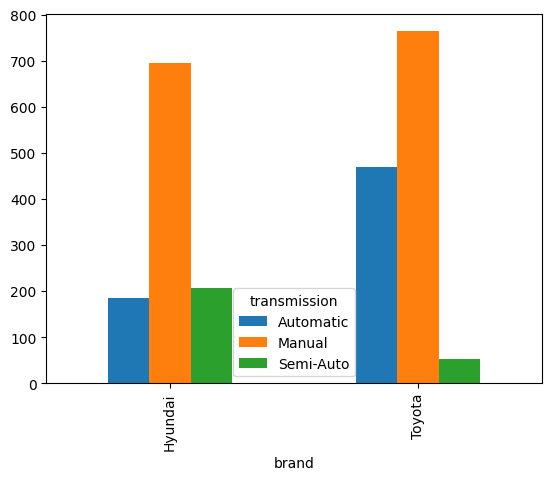

In [ ]:
'''
Hypotheses:
Ho : There is no association between the car brand and their car's transmission type
Ha : There is a connection between the car brand and their car's transmission type
'''

pivot_df.plot(kind='bar')

In [ ]:
stats, pvalue, dof, n = st.chi2_contingency(pivot_df)

In [ ]:
# conclusion
if pvalue > 0.05:
    # Ho
    print(f"""Pvalue = {pvalue}. Pvalue > 0.05. Failed to reject the Ho.
          Not enough evidence to prove that there is a connection between car's brand and their transmission type.""")
    
else:
    # Ha
    print(f"""Pvalue = {pvalue}. Pvalue < 0.05. Failed to reject the Ho.
          There is enough evidence to prove that there is a connection between car's brand and their transmission type.""")

Pvalue = 5.623815000905951e-45. Pvalue < 0.05. Failed to reject the Ho.
          There is enough evidence to prove that there is a connection between car's brand and their transmission type.


### 5. Apakah 50% dari seluruh mobil yang dijual menggunakan bahan bakar Petrol? Buktikan dengan uji statistik!

### Point Estimate with Confidence Interval

In [ ]:
petrol = df.groupby('fuelType')['model'].count()
petrol

fuelType
Diesel     7688
Hybrid     2420
Other       106
Petrol    12052
Name: model, dtype: int64

In [ ]:
mean_sample = petrol.loc['Petrol']/petrol['model'].sum()

In [ ]:
petrol.loc['Petrol']

np.int64(12052)

In [ ]:
from scipy.stats import entropy

In [ ]:
proportions = petrol / petrol.sum()
entropy_value = entropy(proportions)
entropy_value

np.float64(0.9660834587385694)

In [ ]:
price_std = petrol['model'].std()
st_e = price_std / (np.sqrt(len(df)))
st_e

np.float64(35.93960717555288)

In [ ]:
import statsmodels.stats.proportion as cfn

In [ ]:
len(df)

22266

In [ ]:
confidence_interval = cfn.proportion_confint(
    petrol.loc['Petrol'], 
    len(df),
    alpha = 0.05,
    method = 'normal'
)

confidence_interval
# if the hypothesis is to find if the petrol car is between the confidence interval, Ho will be accepted

(0.5347286513249303, 0.5478187303332032)

In [ ]:
petrol['model'].std()

np.float64(5362.834915726321)

In [ ]:
dof = petrol['model'].sum() - 1
tvalue = st.t.ppf(q = 1-(0.05/2), df=dof )

price_std = petrol['model'].std()
st_e = price_std / (np.sqrt(len(df)))

conf_int_plus = mean_sample + (tvalue * st_e)
conf_int_minus = mean_sample - (tvalue * st_e)

conf_int_minus, conf_int_plus

(model   -69.902891
 Name: Petrol, dtype: float64,
 model    70.985439
 Name: Petrol, dtype: float64)

### one sample Z-test

In [ ]:
'''
Hypotheses:
Ho : The proportion of cars using Petrol as fuelType is {percentage}
Ha : The proportion of cars using Petrol as fuelType is not {percentage}
'''

In [ ]:
petrol = df[df['fuelType'] == 'Petrol']['model'].count()
total = len(df)

petrol/total

np.float64(0.5412736908290667)

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [175]:
percentage = 0.535

In [176]:
stats, pvalue = proportions_ztest(count = petrol.loc['Petrol'],
                  nobs = total,
                  value = percentage,
                  alternative='two-sided')

In [177]:
# conclusion
if pvalue > 0.05:
    # Ho
    print(f"""Pvalue = {pvalue}. Pvalue > 0.05. Failed to reject the Ho.
          Not enough evidence to prove that The proportion of cars using Petrol as fuelType is not {percentage * 100}%.""")
    
else:
    # Ha
    print(f"""Pvalue = {pvalue}. Pvalue < 0.05. Successfully reject the Ho.
          There is enough evidence to prove that The proportion of cars using Petrol as fuelType is not {percentage * 100}%.""")

Pvalue = 0.060284583640771154. Pvalue > 0.05. Failed to reject the Ho.
          Not enough evidence to prove that The proportion of cars using Petrol as fuelType is not 53.5%.


### **Referensi buku statistika:**

- Statistics The Art and Science of Learning from Data (Agresti et al., 2018)
- Businees Statistics for Contemporary Decision Making (Black, 2012)
- Practical Statistics for Data Scientist (Bruce & Bruce, 2017)